In [132]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, random_clifford, Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator
import numpy as np
from FastFidelity import Mean_Direct_Fidelity
from LinearAlgebra import InnerProductMatrices 

In [133]:
num_qubits = 5

c:\Users\lucia\miniconda3\envs\qiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


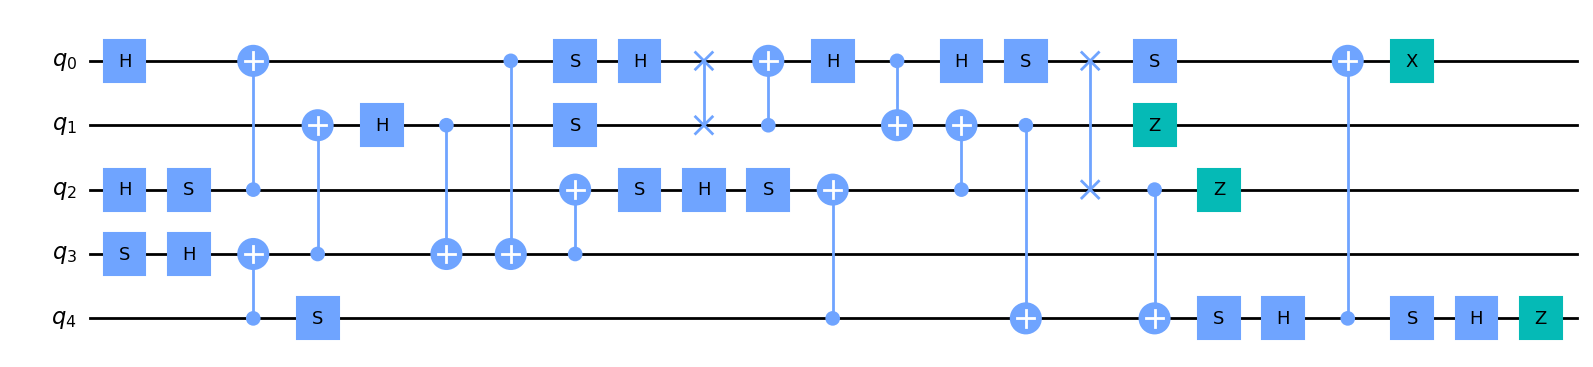

In [134]:
circuit = random_clifford( num_qubits ).to_circuit()
circuit.draw('mpl')

In [135]:
state = np.array( Statevector(circuit) )
rho   = np.outer(state,state.conj())
state

array([-2.50000000e-01-2.22546982e-18j,  2.22546982e-18-2.50000000e-01j,
       -5.90395006e-18-3.36731597e-18j, -3.36731597e-18-5.90395006e-18j,
        2.22546982e-18+2.50000000e-01j,  2.50000000e-01-2.22546982e-18j,
       -3.36731597e-18+5.90395006e-18j,  5.90395006e-18-3.36731597e-18j,
        2.22546982e-18-2.50000000e-01j, -2.50000000e-01-2.22546982e-18j,
       -3.36731597e-18-5.90395006e-18j, -5.90395006e-18-3.36731597e-18j,
        2.50000000e-01-2.22546982e-18j,  2.22546982e-18+2.50000000e-01j,
        5.90395006e-18-3.36731597e-18j, -3.36731597e-18+5.90395006e-18j,
        2.50000000e-01+2.22546982e-18j,  2.22546982e-18-2.50000000e-01j,
       -5.90395006e-18+3.36731597e-18j, -3.36731597e-18+5.90395006e-18j,
       -2.22546982e-18-2.50000000e-01j,  2.50000000e-01-2.22546982e-18j,
        3.36731597e-18+5.90395006e-18j, -5.90395006e-18-3.36731597e-18j,
        2.22546982e-18-2.50000000e-01j,  2.50000000e-01+2.22546982e-18j,
       -3.36731597e-18+5.90395006e-18j, -5.90395006

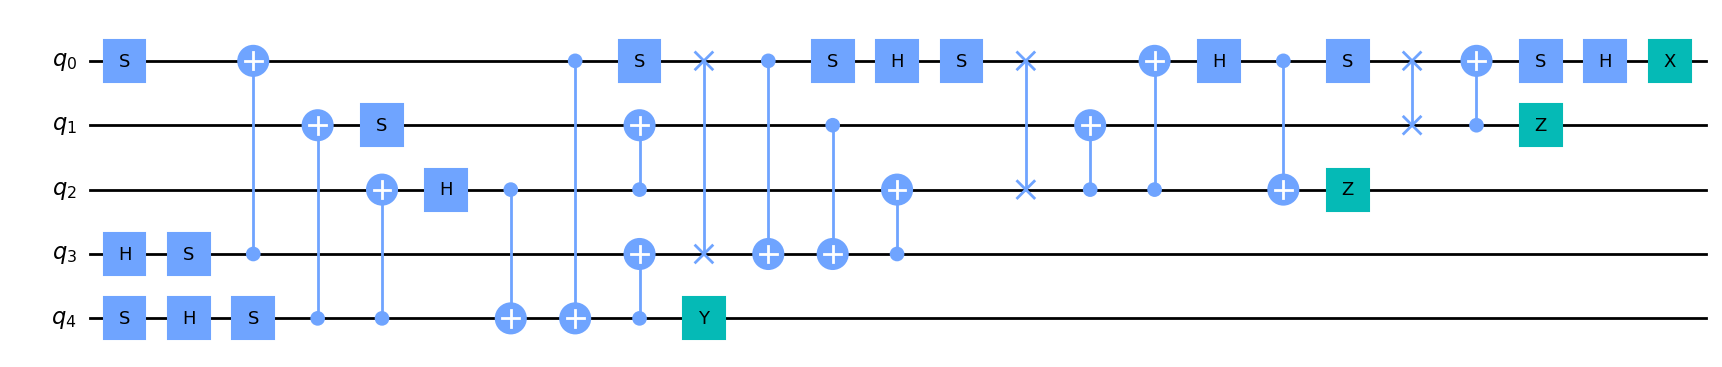

In [136]:
circuit2 = random_clifford( num_qubits ).to_circuit()
circuit2.draw('mpl')

In [139]:
state2 = np.array( Statevector(circuit2) )
rho2   = np.outer(state2,state2.conj())
# state2

In [140]:
MDF = Mean_Direct_Fidelity( num_qubits )

In [141]:
4**num_qubits - np.sum( np.isclose( MDF.Chi( state ), 0 ) )

32

In [142]:
backend = Estimator(backend_options={'shots':1000,
                                        },
                        transpile_options={'optimization_level':0} ) 

# backend_clifford = Estimator(backend_options={'shots':1000,
#                                     'method':"stabilizer",
#                                     },
#                             transpile_options={'optimization_level':0} ) 


In [143]:
abs( np.vdot( state, state ) )**2 

0.9999999999999969

In [144]:
MDF.MeanFidelity(1, 1000, state, circuit, estimator=backend, 
                shots=10000, truncation=False)

1.000000000000001

In [145]:
CHI = MDF.Chi( state ).real
# CHI = InnerProductMatrices( rho, num_qubits*[MDF.Sigmamu] ).reshape(-1)
idx = np.isclose( CHI, 0  ) 
idx = [ not i for i in idx  ]
np.arange(0,4**num_qubits)[idx], np.array( MDF.W )[idx], CHI[idx] 

(array([   0,   12,   65,   77,  162,  174,  227,  239,  288,  300,  353,
         365,  386,  398,  451,  463,  561,  573,  624,  636,  659,  671,
         722,  734,  785,  797,  848,  860,  947,  959, 1010, 1022]),
 array(['IIIII', 'IIIZI', 'IXIIX', 'IXIZX', 'IYYIY', 'IYYZY', 'IZYIZ',
        'IZYZZ', 'XIYII', 'XIYZI', 'XXYIX', 'XXYZX', 'XYIIY', 'XYIZY',
        'XZIIZ', 'XZIZZ', 'YIZIX', 'YIZZX', 'YXZII', 'YXZZI', 'YYXIZ',
        'YYXZZ', 'YZXIY', 'YZXZY', 'ZIXIX', 'ZIXZX', 'ZXXII', 'ZXXZI',
        'ZYZIZ', 'ZYZZZ', 'ZZZIY', 'ZZZZY'], dtype='<U5'),
 array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1.,  1.]))

In [146]:
# for key in MDF.Measures:
#     print( MDF.W[key], MDF.Measures[key] )

In [147]:
# for op in MDF.W:
#     job = backend.run( circuit, Pauli(op) )
#     eval = job.result().values[0]/ np.sqrt(2**num_qubits) 
#     if not np.isclose( eval, 0, rtol=0.1, atol=0.1 ):
#         print( op , eval )